# Approach 3 <hr/>

### <u>Import libraries and dataset</u>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from warnings import simplefilter
from imblearn.over_sampling import SMOTE

# Ignore the warning statements
simplefilter(action='ignore', category=FutureWarning)

In [4]:
"""
# Import the dataset into the notebook
dataset = pd.read_csv("parkinsons.data", sep=',')
dataset.head(10)
"""

# Import the dataset directly from the provided link
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
dataset = pd.read_csv(url)
dataset.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


### <u>Exploratory Data Analysis (EDA)</u>

In [6]:
# Shape of the dataset
print("Number of Records  : ", dataset.shape[0])
print("Number of Features : ", dataset.shape[1])

Number of Records  :  195
Number of Features :  24


In [7]:
# Fields in the dataset
print(dataset.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [8]:
# 'name' field is dropped, as it serves no purpose in the classification
dataset.drop(['name'], axis=1, inplace=True)

# Type coversion of target variable (8-bit unsigned int)
dataset['status'] = dataset['status'].astype('uint8')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [9]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### <u>Data Preprocessing</u>

In [11]:
# Checking for the duplicated rows in dataset
print("Number of duplicated records:", dataset.duplicated().sum())

# if there is/are any duplicated rows present, remove it
# dataset = dataset.drop_duplicates(keep='first')

Number of duplicated records: 0


In [12]:
# Checking for missing values in dataset
print("Count missing values in each column:\n")
print(dataset.isna().sum())

Count missing values in each column:

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [13]:
# Unique values of status field
print("Unique status values:", np.unique(dataset.status))

Unique status values: [0 1]


### <u>Target variable.</u> 
Target variable in this dataset is <strong>'status'</strong>. <br>
<strong>status: 1</strong> - the patient is tested positive (PWD - Patient With Parkinson's Disease) <br>
<strong>status: 0</strong> - the patient is tested negative (Healthy person) <br>

<Axes: xlabel='status', ylabel='count'>

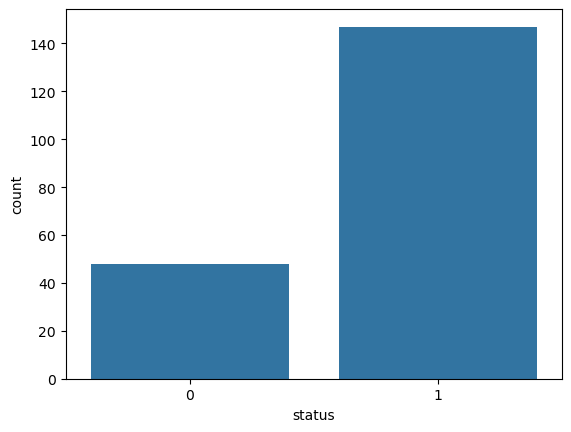

In [15]:
# Balance of Data using a countplot
sns.countplot(x='status', data=dataset)

### <br><u>Oversampling the data to remove imbalance in the data. </u>

In [17]:
X = dataset.drop(['status'], axis=1, inplace=False)
Y = dataset['status']

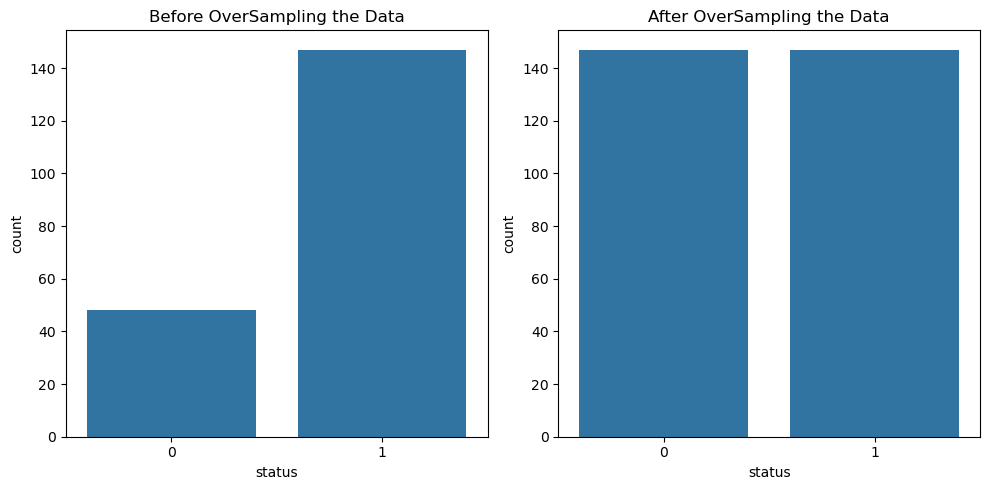

In [18]:
# Balance of data using a countplot

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sns.countplot(x='status', data=dataset)
plt.title("Before OverSampling the Data")

smote = SMOTE(random_state=2)
X, Y = smote.fit_resample(X, Y.ravel())
Data_Y = pd.DataFrame(Y, columns=["status"])

plt.subplot(1,2,2)
sns.countplot(x='status', data=Data_Y)
plt.title("After OverSampling the Data")

plt.tight_layout()
plt.show()

In [19]:
dataset_over_sampled = pd.concat([X, pd.Series(Y)], axis=1)
dataset_over_sampled = dataset_over_sampled.rename(columns={0: 'status'})
dataset_over_sampled.head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775,1
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755,1
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571,1
9,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362,1


In [20]:
# Shape of the dataset
print("Number of Records  : ", dataset_over_sampled.shape[0])
print("Number of Features : ", dataset_over_sampled.shape[1])

Number of Records  :  294
Number of Features :  23


In [21]:
dataset_over_sampled.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,...,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,165.399656,205.796850,125.537129,0.005463,0.000037,0.002850,0.002984,0.008552,0.025871,0.244278,...,0.041312,0.020524,22.691911,0.479267,0.709789,-6.038786,0.203703,2.322572,0.177796,0.500000
std,47.410678,90.015931,50.721176,0.004221,0.000031,0.002563,0.002387,0.007689,0.016477,0.169527,...,0.026504,0.034804,4.132018,0.099244,0.054537,1.066668,0.083117,0.363387,0.086283,0.500853
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,120.272500,137.256509,88.014224,0.003148,0.000020,0.001520,0.001672,0.004559,0.016080,0.145019,...,0.024890,0.004863,20.376921,0.405468,0.661968,-6.919867,0.146191,2.059382,0.110156,0.000000
50%,154.540500,199.545500,107.559000,0.004338,0.000030,0.002084,0.002233,0.006257,0.020039,0.189000,...,0.033193,0.008765,23.353025,0.467349,0.712333,-6.161648,0.196039,2.318157,0.160533,0.500000
75%,203.160218,244.265085,149.254250,0.006088,0.000040,0.003310,0.003350,0.009940,0.030216,0.270750,...,0.047310,0.020515,25.128614,0.556907,0.756646,-5.437111,0.260168,2.518647,0.224775,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


In [22]:
# Checking for the duplicated rows in dataset
print("Number of duplicated records:", dataset_over_sampled.duplicated().sum())

# if there is/are any duplicated rows present, remove it
# dataset = dataset.drop_duplicates(keep='first')

Number of duplicated records: 0


In [23]:
# Checking for missing values in dataset
print("Count missing values in each column:\n")
print(dataset_over_sampled.isna().sum())

Count missing values in each column:

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64


### <u>NHR (Noise to Harmonics Ratio)</u>
NHR is the amount of noise relative to harmonic (period) components in a  signal. Higher NHR value signifies that the noise is higher that suggests in less clear or more disordered voice. It is often used to evaluate voice quality, particularly in clinical departments, as higher noise levels can indiacte vocal pathologies or breathiness in speech. <br>
### <u>HNR (Harmonics to Noise Ratio)</u>
HNR is the inverse, measuring the ratio of harmonic content to noise in the signal. Higher HNR values suggest a cleaner, more periodic sound, indicating better voice quality. It is frequently used in speech analysis to evaluate clarity, voice quality, or presence of vocal disorders. High HNR typically reflects a healthy vocal production.<br><br>

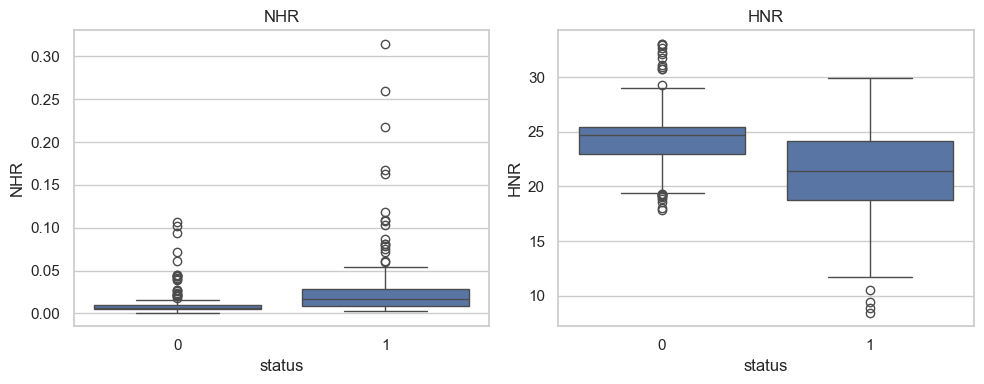

In [25]:
# Boxplot of NHR and HNR

plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

plt.subplot(1,2,1)
sns.boxplot(x='status', y="NHR", data=dataset_over_sampled)
plt.title("NHR")

plt.subplot(1,2,2)
sns.boxplot(x='status', y="HNR", data=dataset_over_sampled)
plt.title("HNR")

plt.tight_layout()
plt.show()

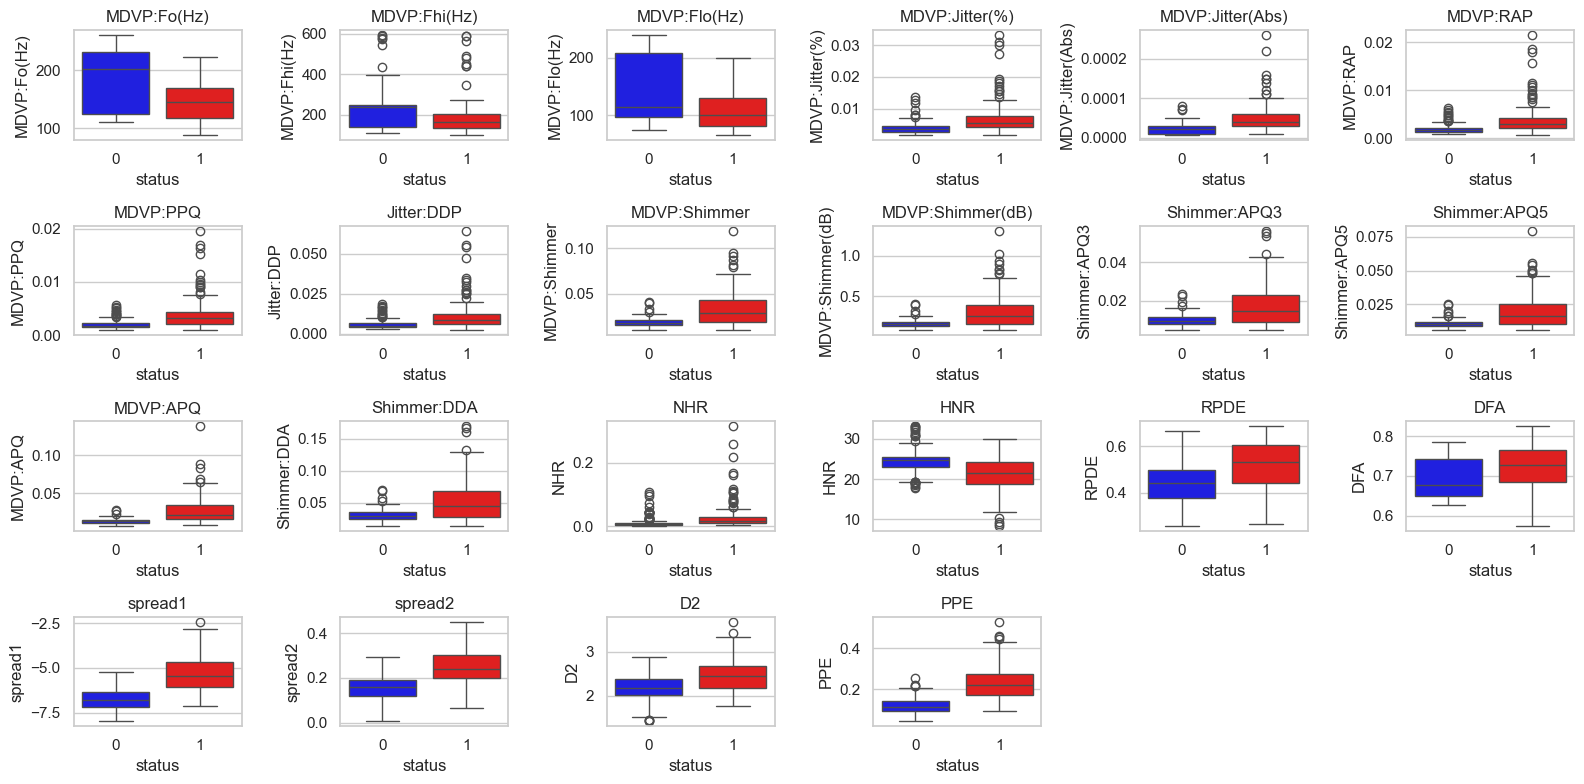

In [26]:
# Boxplot of every feature vs status

i = 0
plt.figure(figsize=(16,8))
sns.set(style='whitegrid')

for attribute in dataset.drop(['status'], axis=1, inplace=False).columns:
  i += 1
  plt.subplot(4,6,i)
  sns.boxplot(x='status', y=attribute, data=dataset_over_sampled, palette={'0':'blue', '1':'red'})
  plt.title(attribute)
    
plt.tight_layout()
plt.show()

In [27]:
# Skewness of the feaures
num_features = dataset_over_sampled.select_dtypes(include='number').columns
skewness = dataset_over_sampled[num_features].skew()
print("Skewness of Numerical Features:\n")
print(skewness)

Skewness of Numerical Features:

MDVP:Fo(Hz)         0.310344
MDVP:Fhi(Hz)        2.289989
MDVP:Flo(Hz)        1.012208
MDVP:Jitter(%)      3.541615
MDVP:Jitter(Abs)    2.982288
MDVP:RAP            3.895464
MDVP:PPQ            3.612463
Jitter:DDP          3.896646
MDVP:Shimmer        2.207958
MDVP:Shimmer(dB)    2.550160
Shimmer:APQ3        2.098570
Shimmer:APQ5        2.360108
MDVP:APQ            3.191826
Shimmer:DDA         2.098583
NHR                 4.760633
HNR                -0.581853
RPDE                0.074609
DFA                 0.134659
spread1             0.751924
spread2             0.325103
D2                  0.451795
PPE                 1.151920
status              0.000000
dtype: float64


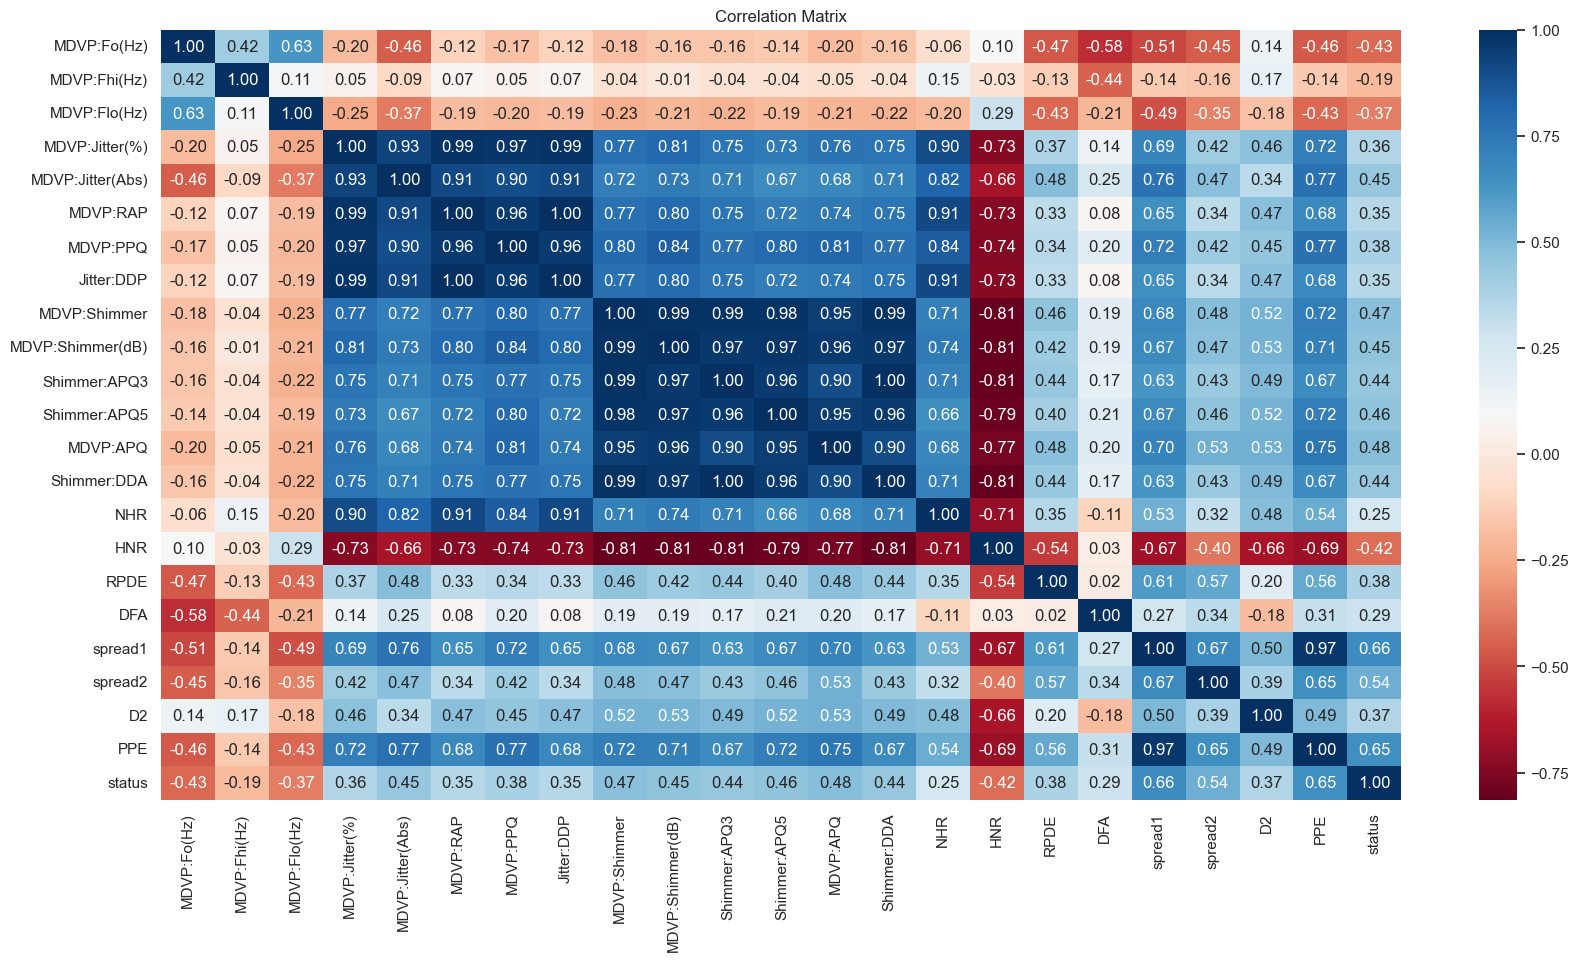

In [28]:
# Correlation matrix of the dataset
correlation_matrix = dataset_over_sampled.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

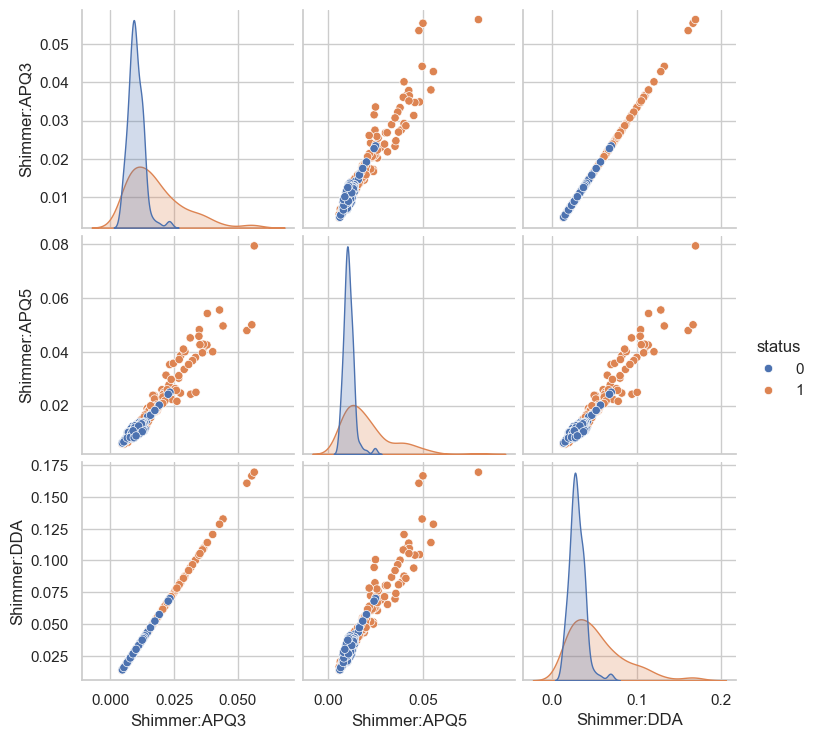

In [29]:
# Pairplot of Shimmer data
sns.pairplot(dataset_over_sampled, hue='status', vars=['Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA'])

In [30]:
dataset_over_sampled['status'].value_counts()

status
1    147
0    147
Name: count, dtype: int64

### <u>Methods to evaluate and display metrics</u>

In [32]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC Score']

def evaluateMetrics(cm):
    accuracy = float((cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))
    precision = float(cm[1][1] / (cm[1][1] + cm[0][1]))
    recall = float(cm[1][1] / (cm[1][0] + cm[1][1]))
    f1_score = 2 * ((precision * recall) / (precision + recall))
    return list([accuracy, precision, recall, f1_score])

def displayMetrics(values, auc):
    print(f"{metrics[0]: >10} : {values[0]}")
    print(f"{metrics[1]: >10} : {values[1]}")
    print(f"{metrics[2]: >10} : {values[2]}")
    print(f"{metrics[3]: >10} : {values[3]}")
    print(f"{metrics[4]: >10} : {auc}")

### <u>Split dependent and independent variables</u>

In [34]:
# Splitting dependent and independent fields
X = dataset_over_sampled.drop(['status'], axis=1, inplace=False)
Y = dataset_over_sampled['status']

### <u>Normalization of the dataset using StandardScaler</u>

In [36]:
# Normalizing the dependent variables
scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)

### <u>Split into train dataset and test dataset</u>

In [38]:
# Splitting the dataset into 75% train data and 25 % test data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)
print(type(X_train), type(Y_train))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [39]:
print(len(X), len(Y))

294 294


## <br><hr/> Machine Learning Models <hr/>

### 1. <u>Logistic Regression</u>

#### <li>L1 Regularization</li>

In [43]:
lr1_model = LogisticRegression(
    penalty='l1', C=1.0, solver='liblinear', random_state=42
)
lr1_model.fit(X_train, Y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [44]:
lr1_predictions = lr1_model.predict(X_test)
print(classification_report(Y_test, lr1_predictions))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.79      0.89      0.84        38

    accuracy                           0.82        74
   macro avg       0.83      0.82      0.82        74
weighted avg       0.83      0.82      0.82        74



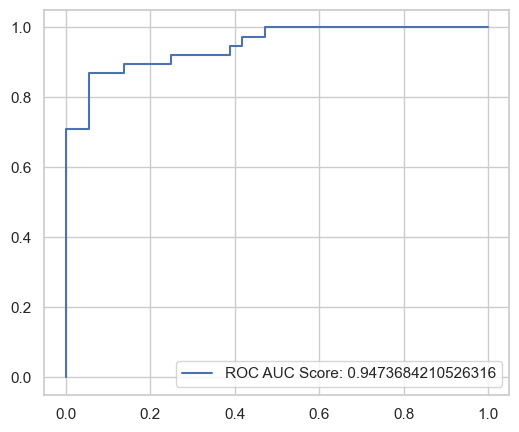

In [45]:
# ROC Curve
lr1_yprob = lr1_model.predict_proba(X_test)[:, 1]
lr1_fpr, lr1_tpr, lr1_threshold = roc_curve(y_true=Y_test, y_score=lr1_yprob)
lr1_auc_value = roc_auc_score(Y_test, lr1_yprob)

plt.figure(figsize=(6, 5))
plt.plot(lr1_fpr, lr1_tpr, label=f"ROC AUC Score: {lr1_auc_value}")
plt.legend(loc=4)
plt.show()

In [46]:
# Accuracy Scores for train and test data
lr1_X_train_pred = lr1_model.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, lr1_X_train_pred))
lr1_X_test_pred = lr1_model.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, lr1_X_test_pred))

Accuracy Score of trained data :  0.8272727272727273
Accuracy Score of test data :  0.8243243243243243


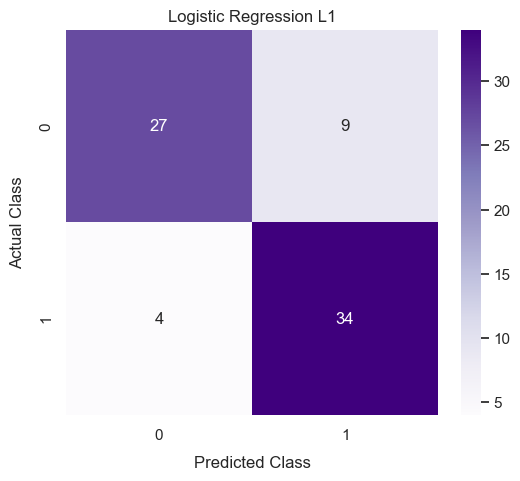

In [47]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
lr1_cm = confusion_matrix(Y_test, lr1_predictions)
sns.heatmap(lr1_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("Logistic Regression L1")
plt.show()

In [48]:
displayMetrics(evaluateMetrics(lr1_cm), lr1_auc_value)

  Accuracy : 0.8243243243243243
 Precision : 0.7906976744186046
    Recall : 0.8947368421052632
  F1-Score : 0.8395061728395061
 AUC Score : 0.9473684210526316


#### <li>L2 Regularization</li>

In [50]:
lr2_model = LogisticRegression(
    penalty='l2', C=1.0, solver='liblinear', random_state=42
)
lr2_model.fit(X_train, Y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [51]:
lr2_predictions = lr2_model.predict(X_test)
print(classification_report(Y_test, lr2_predictions))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.80      0.92      0.85        38

    accuracy                           0.84        74
   macro avg       0.85      0.84      0.84        74
weighted avg       0.85      0.84      0.84        74



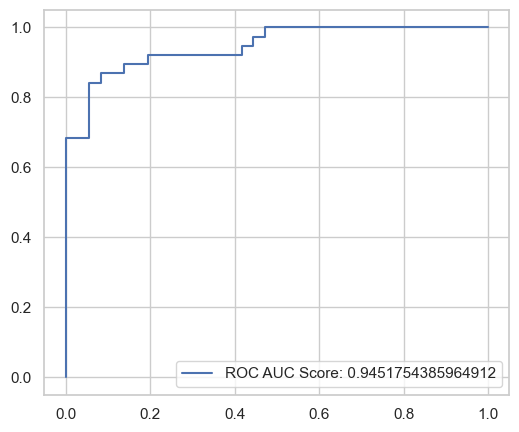

In [52]:
# ROC Curve
lr2_yprob = lr2_model.predict_proba(X_test)[:, 1]
lr2_fpr, lr2_tpr, lr2_threshold = roc_curve(y_true=Y_test, y_score=lr2_yprob)
lr2_auc_value = roc_auc_score(Y_test, lr2_yprob)

plt.figure(figsize=(6, 5))
plt.plot(lr2_fpr, lr2_tpr, label=f"ROC AUC Score: {lr2_auc_value}")
plt.legend(loc=4)
plt.show()

In [53]:
# Accuracy Scores for train and test data
lr2_X_train_pred = lr2_model.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, lr2_X_train_pred))
lr2_X_test_pred = lr2_model.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, lr2_X_test_pred))

Accuracy Score of trained data :  0.8318181818181818
Accuracy Score of test data :  0.8378378378378378


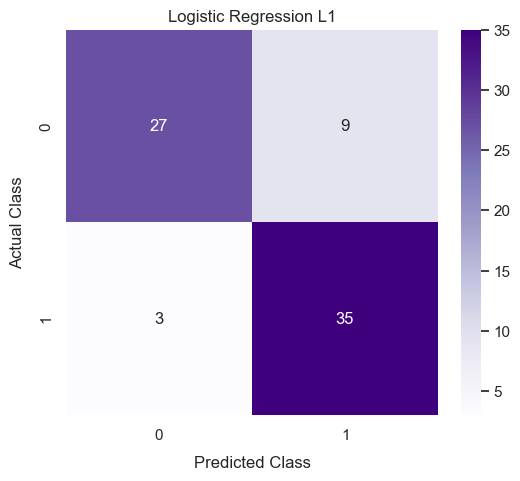

In [54]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
lr2_cm = confusion_matrix(Y_test, lr2_predictions)
sns.heatmap(lr2_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("Logistic Regression L1")
plt.show()

In [55]:
displayMetrics(evaluateMetrics(lr2_cm), lr2_auc_value)

  Accuracy : 0.8378378378378378
 Precision : 0.7954545454545454
    Recall : 0.9210526315789473
  F1-Score : 0.8536585365853658
 AUC Score : 0.9451754385964912


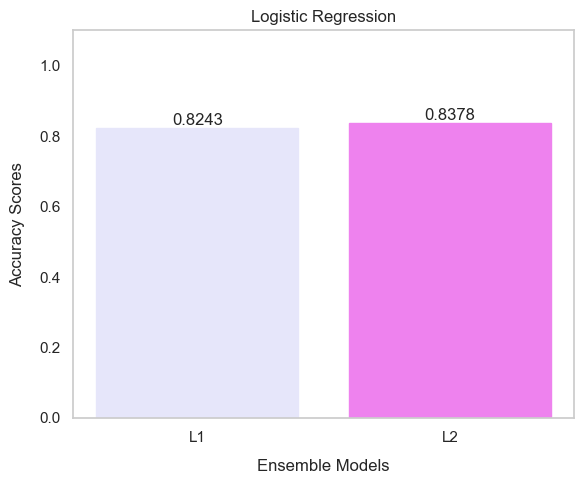

In [56]:
# Comparing both Logistic Regression Models
# Bar Plot of Accuracies

lr_models = ["L1", "L2"]
l1 = list(evaluateMetrics(lr1_cm))
l1.append(lr1_auc_value)
l2 = list(evaluateMetrics(lr2_cm))
l2.append(lr2_auc_value)
lr_accuracies = [l1[0], l2[0]]
# print(lr_accuracies)

plt.figure(figsize=(6, 5))
lr_graph = plt.bar(lr_models, lr_accuracies)
plt.xlabel("Ensemble Models", labelpad=10)
plt.ylabel("Accuracy Scores", labelpad=10)
plt.title("Logistic Regression")
plt.ylim(0, 1.10)
plt.xticks()

for i in range(2):
    plt.text(x=i, y=lr_accuracies[i], s=f"{lr_accuracies[i]:.4f}", ha="center", va="bottom")

lr_graph[0].set_color('lavender')
lr_graph[1].set_color('violet')
plt.tight_layout()
plt.grid(False)
plt.show()

In [57]:
# Table between metrics of both models

lr1_metrics = {metrics[i]: l1[i] for i in range(len(metrics))}
lr2_metrics = {metrics[i]: l2[i] for i in range(len(metrics))}
lr_table = pd.DataFrame({
    'L1 Model' : lr1_metrics, 
    'L2 Model' : lr2_metrics
})
print(lr_table)

           L1 Model  L2 Model
Accuracy   0.824324  0.837838
Precision  0.790698  0.795455
Recall     0.894737  0.921053
F1-Score   0.839506  0.853659
AUC Score  0.947368  0.945175


### 2. <u>Random Forest Classifier</u>

In [59]:
rfc_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_leaf=4, 
    min_samples_split=10, max_features='sqrt', bootstrap=True, 
    random_state=42
)
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [60]:
rfc_predictions = rfc_model.predict(X_test)
print(classification_report(Y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.93      0.97      0.95        38

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74



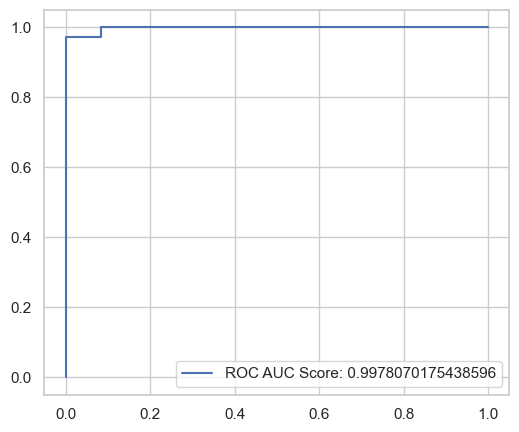

In [61]:
# ROC Curve
rfc_yprob = rfc_model.predict_proba(X_test)[:, 1]
rfc_fpr, rfc_tpr, threshold = roc_curve(Y_test, rfc_yprob)
rfc_auc_value = roc_auc_score(Y_test, rfc_yprob)

plt.figure(figsize=(6, 5))
plt.plot(rfc_fpr, rfc_tpr, label=f"ROC AUC Score: {rfc_auc_value}")
plt.legend(loc=4)
plt.show()

In [62]:
# Accuracy Scores for train and test data
rfc_X_train_pred = rfc_model.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, rfc_X_train_pred))
rfc_X_test_pred = rfc_model.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, rfc_X_test_pred))

Accuracy Score of trained data :  0.9863636363636363
Accuracy Score of test data :  0.9459459459459459


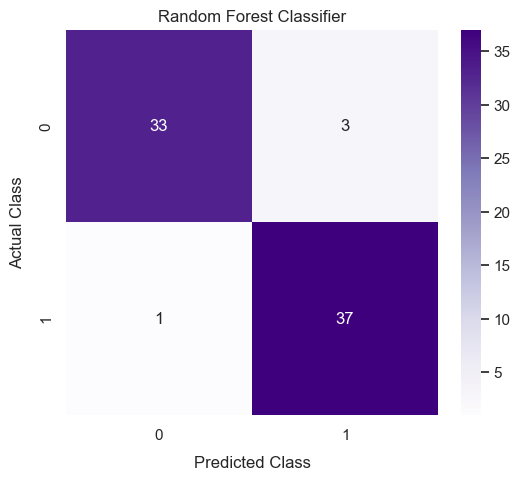

In [63]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
rfc_cm = confusion_matrix(Y_test, rfc_predictions)
sns.heatmap(rfc_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("Random Forest Classifier")
plt.show()

In [64]:
displayMetrics(evaluateMetrics(rfc_cm), rfc_auc_value)

  Accuracy : 0.9459459459459459
 Precision : 0.925
    Recall : 0.9736842105263158
  F1-Score : 0.9487179487179489
 AUC Score : 0.9978070175438596


### 3. <u>Support Vector Machine (SVM)</u>

#### <li>Linear kernel</li>

In [67]:
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [68]:
svm_linear_predictions = svm_linear.predict(X_test)
print(classification_report(Y_test, svm_linear_predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.87      0.89      0.88        38

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



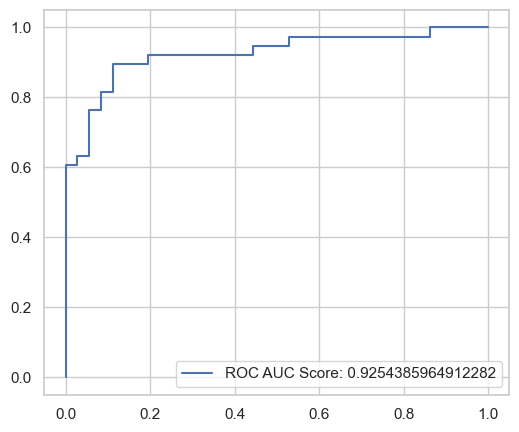

In [69]:
# ROC Curve
svm_linear_yprob = svm_linear.predict_proba(X_test)[:, 1]
svm1_fpr, svm1_tpr, svm1_threshold = roc_curve(Y_test, svm_linear_yprob)
svm_linear_auc_value = roc_auc_score(Y_test, svm_linear_yprob)

plt.figure(figsize=(6, 5))
plt.plot(svm1_fpr, svm1_tpr, label=f"ROC AUC Score: {svm_linear_auc_value}")
plt.legend(loc=4)
plt.show()

In [70]:
# Accuracy Scores for train and test data
svm1_X_train_pred = svm_linear.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, svm1_X_train_pred))
svm1_X_test_pred = svm_linear.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, svm1_X_test_pred))

Accuracy Score of trained data :  0.8727272727272727
Accuracy Score of test data :  0.8783783783783784


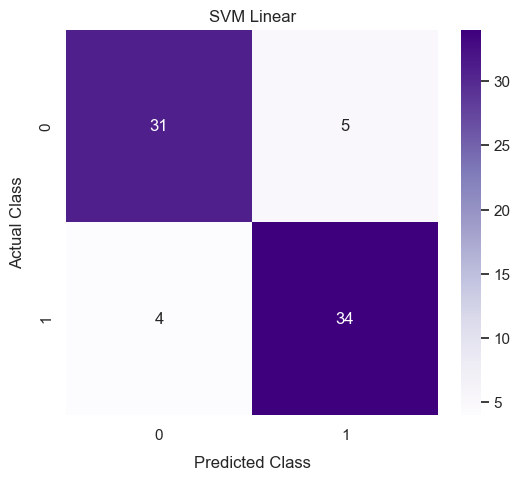

In [71]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
svm_linear_cm = confusion_matrix(Y_test, svm_linear_predictions)
sns.heatmap(svm_linear_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("SVM Linear")
plt.show()

In [72]:
displayMetrics(evaluateMetrics(svm_linear_cm), svm_linear_auc_value)

  Accuracy : 0.8783783783783784
 Precision : 0.8717948717948718
    Recall : 0.8947368421052632
  F1-Score : 0.8831168831168831
 AUC Score : 0.9254385964912282


#### <li>Polynomial kernel</li>

In [74]:
svm_poly = SVC(kernel='poly', probability=True)
svm_poly.fit(X_train, Y_train)

SVC(kernel='poly', probability=True)

In [75]:
svm_poly_predictions = svm_poly.predict(X_test)
print(classification_report(Y_test, svm_poly_predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.94      0.89      0.92        38

    accuracy                           0.92        74
   macro avg       0.92      0.92      0.92        74
weighted avg       0.92      0.92      0.92        74



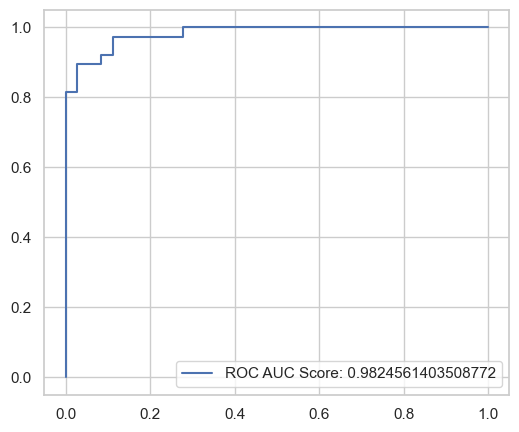

In [76]:
# ROC Curve
svm_poly_yprob = svm_poly.predict_proba(X_test)[:, 1]
svm2_fpr, svm2_tpr, svm2_threshold = roc_curve(Y_test, svm_poly_yprob)
svm_poly_auc_value = roc_auc_score(Y_test, svm_poly_yprob)

plt.figure(figsize=(6, 5))
plt.plot(svm2_fpr, svm2_tpr, label=f"ROC AUC Score: {svm_poly_auc_value}")
plt.legend(loc=4)
plt.show()

In [77]:
# Accuracy Scores for train and test data
svm2_X_train_pred = svm_poly.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, svm2_X_train_pred))
svm2_X_test_pred = svm_poly.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, svm2_X_test_pred))

Accuracy Score of trained data :  0.8818181818181818
Accuracy Score of test data :  0.918918918918919


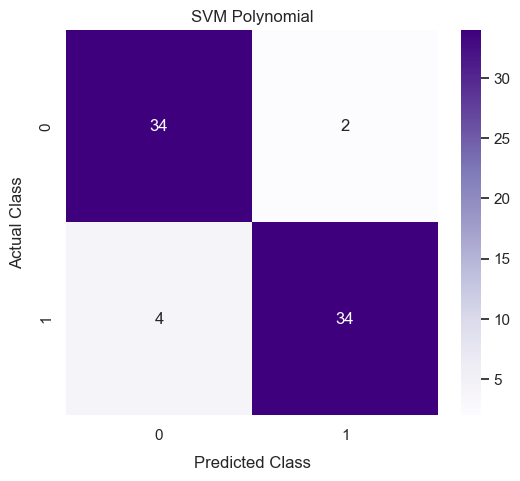

In [78]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
svm_poly_cm = confusion_matrix(Y_test, svm_poly_predictions)
sns.heatmap(svm_poly_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("SVM Polynomial")
plt.show()

In [79]:
displayMetrics(evaluateMetrics(svm_poly_cm), svm_poly_auc_value)

  Accuracy : 0.918918918918919
 Precision : 0.9444444444444444
    Recall : 0.8947368421052632
  F1-Score : 0.918918918918919
 AUC Score : 0.9824561403508772


#### <li>Sigmoid kernel</li>

In [81]:
svm_sigmoid = SVC(kernel='sigmoid', probability=True)
svm_sigmoid.fit(X_train, Y_train)

SVC(kernel='sigmoid', probability=True)

In [82]:
svm_sigmoid_predictions = svm_sigmoid.predict(X_test)
print(classification_report(Y_test, svm_sigmoid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.87      0.89      0.88        38

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74



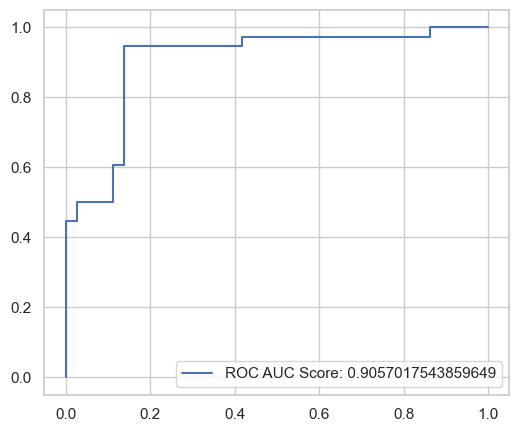

In [83]:
# ROC Curve
svm_sigmoid_yprob = svm_sigmoid.predict_proba(X_test)[:, 1]
svm3_fpr, svm3_tpr, svm3_threshold = roc_curve(Y_test, svm_sigmoid_yprob)
svm_sigmoid_auc_value = roc_auc_score(Y_test, svm_sigmoid_yprob)

plt.figure(figsize=(6, 5))
plt.plot(svm3_fpr, svm3_tpr, label=f"ROC AUC Score: {svm_sigmoid_auc_value}")
plt.legend(loc=4)
plt.show()

In [84]:
# Accuracy Scores for train and test data
svm3_X_train_pred = svm_sigmoid.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, svm3_X_train_pred))
svm3_X_test_pred = svm_sigmoid.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, svm3_X_test_pred))

Accuracy Score of trained data :  0.7727272727272727
Accuracy Score of test data :  0.8783783783783784


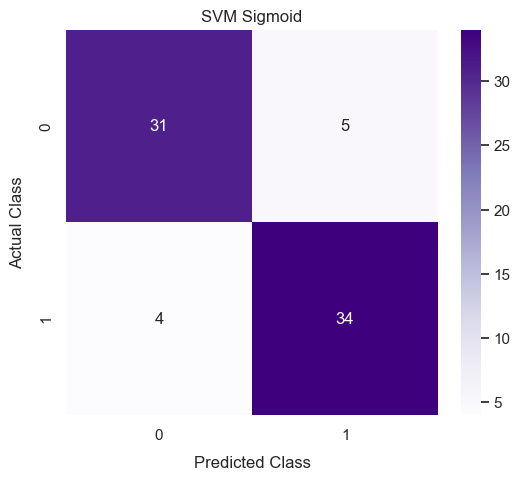

In [85]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
svm_sigmoid_cm = confusion_matrix(Y_test, svm_sigmoid_predictions)
sns.heatmap(svm_sigmoid_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("SVM Sigmoid")
plt.show()

In [86]:
displayMetrics(evaluateMetrics(svm_sigmoid_cm), svm_sigmoid_auc_value)

  Accuracy : 0.8783783783783784
 Precision : 0.8717948717948718
    Recall : 0.8947368421052632
  F1-Score : 0.8831168831168831
 AUC Score : 0.9057017543859649


#### <li>RBF kernel</li>

In [88]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, Y_train)

SVC(probability=True)

In [89]:
svm_rbf_predictions = svm_rbf.predict(X_test)
print(classification_report(Y_test, svm_rbf_predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.95      0.92      0.93        38

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



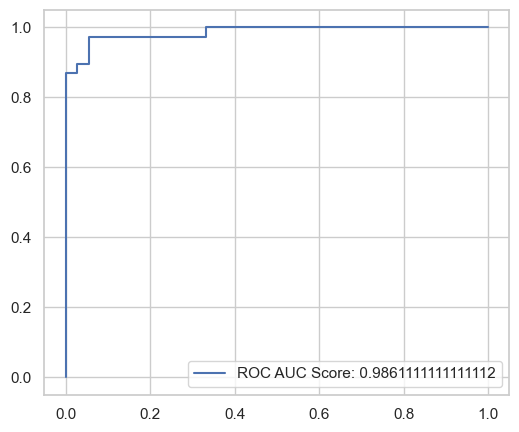

In [90]:
# ROC Curve
svm_rbf_yprob = svm_rbf.predict_proba(X_test)[:, 1]
svm4_fpr, svm4_tpr, svm4_threshold = roc_curve(Y_test, svm_rbf_yprob)
svm_rbf_auc_value = roc_auc_score(Y_test, svm_rbf_yprob)

plt.figure(figsize=(6, 5))
plt.plot(svm4_fpr, svm4_tpr, label=f"ROC AUC Score: {svm_rbf_auc_value}")
plt.legend(loc=4)
plt.show()

In [91]:
# Accuracy Scores for train and test data
svm4_X_train_pred = svm_rbf.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, svm4_X_train_pred))
svm4_X_test_pred = svm_rbf.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, svm4_X_test_pred))

Accuracy Score of trained data :  0.9318181818181818
Accuracy Score of test data :  0.9324324324324325


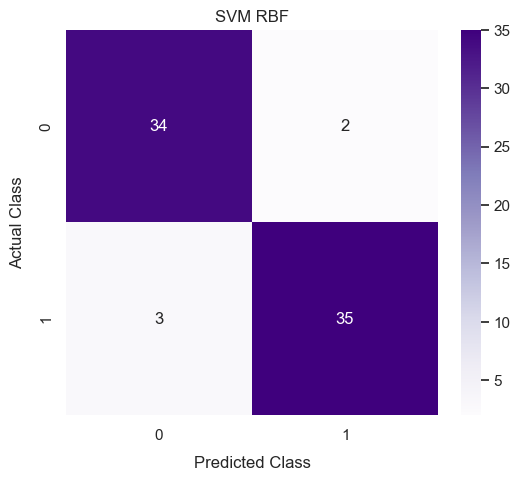

In [92]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
svm_rbf_cm = confusion_matrix(Y_test, svm_rbf_predictions)
sns.heatmap(svm_rbf_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("SVM RBF")
plt.show()

In [93]:
displayMetrics(evaluateMetrics(svm_rbf_cm), svm_rbf_auc_value)

  Accuracy : 0.9324324324324325
 Precision : 0.9459459459459459
    Recall : 0.9210526315789473
  F1-Score : 0.9333333333333332
 AUC Score : 0.9861111111111112


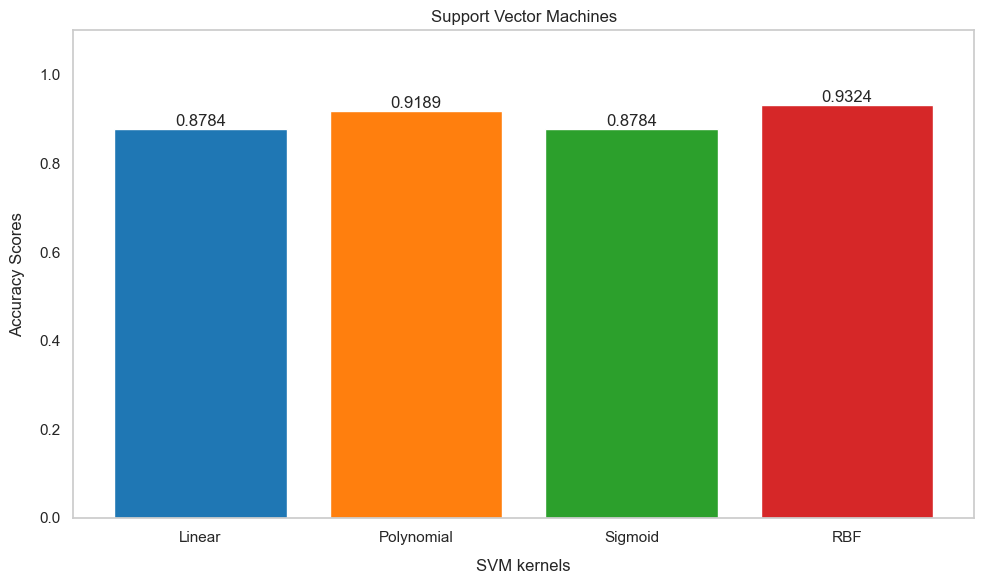

In [94]:
# Comparing all SVM Models
# Bar Plot of Accuracies

svm1 = evaluateMetrics(svm_linear_cm)
svm1.append(svm_linear_auc_value)
svm2 = evaluateMetrics(svm_poly_cm)
svm2.append(svm_poly_auc_value)
svm3 = evaluateMetrics(svm_sigmoid_cm)
svm3.append(svm_sigmoid_auc_value)
svm4 = evaluateMetrics(svm_rbf_cm)
svm4.append(svm_rbf_auc_value)

svm_kernels = ["Linear", "Polynomial", "Sigmoid", "RBF"]
svm_accuracies = [svm1[0], svm2[0], svm3[0], svm4[0]]
# print(svm_accuracies)

colors = [
    (31/255, 119/255, 180/255),    # Vibrant Blue
    (255/255, 127/255, 14/255),    # Bright Orange
    (44/255, 160/255, 44/255),     # Bright Green
    (214/255, 39/255, 40/255)      # Purplish Red
]

plt.figure(figsize=(10, 6))
svm_graph = plt.bar(svm_kernels, svm_accuracies, color=colors)
plt.xlabel("SVM kernels", labelpad=10)
plt.ylabel("Accuracy Scores", labelpad=10)
plt.title("Support Vector Machines")
plt.ylim(0, 1.10)
plt.xticks()


for i in range(4):
    plt.text(x=i, y=svm_accuracies[i], s=f"{svm_accuracies[i]:.4f}", ha="center", va="bottom")

plt.tight_layout()
plt.grid(False)
plt.show()

In [95]:
# Table between metrics of all kernels

svm1_metrics = {metrics[i]: svm1[i] for i in range(len(metrics))}
svm2_metrics = {metrics[i]: svm2[i] for i in range(len(metrics))}
svm3_metrics = {metrics[i]: svm3[i] for i in range(len(metrics))}
svm4_metrics = {metrics[i]: svm4[i] for i in range(len(metrics))}

svm_table = pd.DataFrame({
    'Linear ': svm1_metrics, 'Polynomial': svm2_metrics, 
    'Sigmoid ': svm3_metrics, 'RBF': svm4_metrics
})
print(svm_table)

            Linear   Polynomial  Sigmoid        RBF
Accuracy   0.878378    0.918919  0.878378  0.932432
Precision  0.871795    0.944444  0.871795  0.945946
Recall     0.894737    0.894737  0.894737  0.921053
F1-Score   0.883117    0.918919  0.883117  0.933333
AUC Score  0.925439    0.982456  0.905702  0.986111


### 4. <u>K-Nearest Neighbors (KNN)</u>

#####  Usually for Binary classification dataset, n_neighbors should be 2 no matter what.

In [98]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [99]:
knn_predictions = knn_model.predict(X_test)
print(classification_report(Y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        36
           1       1.00      0.89      0.94        38

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74



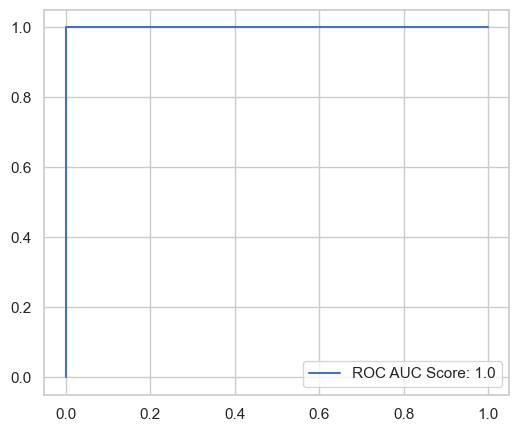

In [100]:
# ROC Curve
knn_yprob = knn_model.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, knn_threshold = roc_curve(Y_test, knn_yprob)
knn_auc_value = roc_auc_score(Y_test, knn_yprob)

plt.figure(figsize=(6, 5))
plt.plot(knn_fpr, knn_tpr, label=f"ROC AUC Score: {knn_auc_value}")
plt.legend(loc=4)
plt.show()

In [101]:
# Accuracy Scores for train and test data
knn_X_train_pred = knn_model.predict(X_train)
print("Accuracy Score of trained data : ", accuracy_score(Y_train, knn_X_train_pred))
knn_X_test_pred = knn_model.predict(X_test)
print("Accuracy Score of test data : ", accuracy_score(Y_test, knn_X_test_pred))

Accuracy Score of trained data :  0.9590909090909091
Accuracy Score of test data :  0.9459459459459459


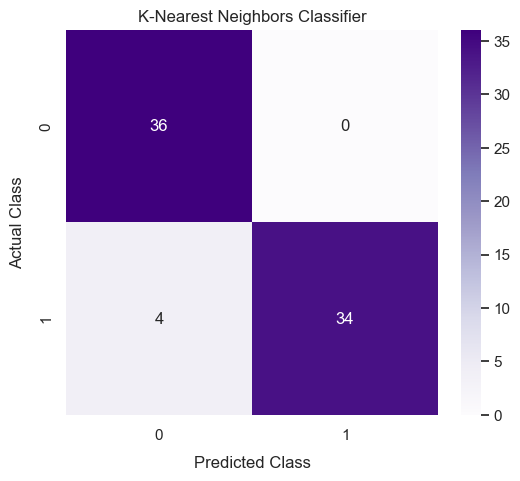

In [102]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
knn_cm = confusion_matrix(Y_test, knn_predictions)
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("K-Nearest Neighbors Classifier")
plt.show()

In [103]:
displayMetrics(evaluateMetrics(knn_cm), knn_auc_value)

  Accuracy : 0.9459459459459459
 Precision : 1.0
    Recall : 0.8947368421052632
  F1-Score : 0.9444444444444444
 AUC Score : 1.0


### 5. <u>Naive-Bayes Classifier</u>

#### <li>Gaussian Naive-Bayes Classifier using GridSearchCV</li>

In [106]:
gnb = GaussianNB()
gnb_params = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03]}
grid_search = GridSearchCV(estimator=gnb, cv=3, param_grid=gnb_params, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print("The best var_smoothing value :", grid_search.best_params_)

# Choose the best Gaussian Naive-Bayes Estimator
gnb_model = grid_search.best_estimator_

The best var_smoothing value : {'var_smoothing': 1e-09}


In [107]:
gnb_predictions = gnb_model.predict(X_test)
print(classification_report(Y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        36
           1       0.84      0.68      0.75        38

    accuracy                           0.77        74
   macro avg       0.78      0.77      0.77        74
weighted avg       0.78      0.77      0.77        74



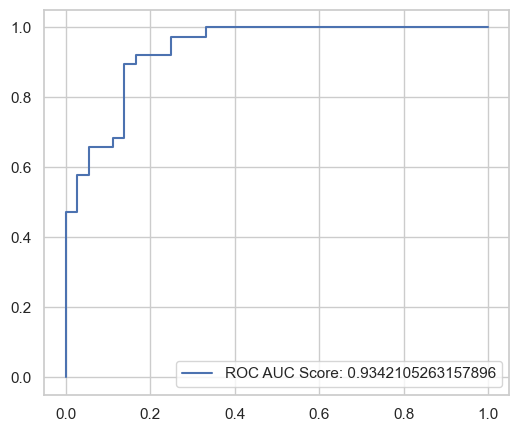

In [108]:
# ROC Curve
gnb_yprob = gnb_model.predict_proba(X_test)[:, 1]
gnb_fpr, gnb_tpr, gnb_threshold = roc_curve(Y_test, gnb_yprob)
gnb_auc_value = roc_auc_score(Y_test, gnb_yprob)

plt.figure(figsize=(6, 5))
plt.plot(gnb_fpr, gnb_tpr, label=f"ROC AUC Score: {gnb_auc_value}")
plt.legend(loc=4)
plt.show()

In [109]:
# Accuracy Scores for train and test data
gnb_X_train_pred = gnb_model.predict(X_train)
print("Accuracy Score of trained data : ", accuracy_score(Y_train, gnb_X_train_pred))
gnb_X_test_pred = gnb_model.predict(X_test)
print("Accuracy Score of test data : ", accuracy_score(Y_test, gnb_X_test_pred))

Accuracy Score of trained data :  0.7772727272727272
Accuracy Score of test data :  0.7702702702702703


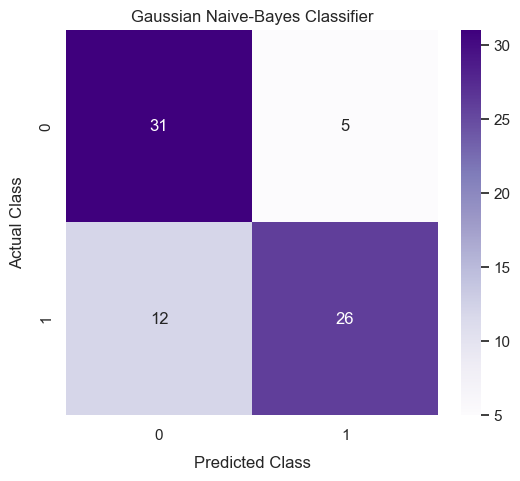

In [110]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
gnb_cm = confusion_matrix(Y_test, gnb_predictions)
sns.heatmap(gnb_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("Gaussian Naive-Bayes Classifier")
plt.show()

In [111]:
displayMetrics(evaluateMetrics(gnb_cm), gnb_auc_value)

  Accuracy : 0.7702702702702703
 Precision : 0.8387096774193549
    Recall : 0.6842105263157895
  F1-Score : 0.7536231884057972
 AUC Score : 0.9342105263157896


#### <li>Multinomial Naive-Bayes Classifier using GridSearchCV</li>

In [113]:
minmax = MinMaxScaler()
X_train1 = minmax.fit_transform(X_train)
X_test1 = minmax.fit_transform(X_test)

In [114]:
mnb = MultinomialNB()
mnb_params = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
grid_search = GridSearchCV(estimator=mnb, cv=3, param_grid=mnb_params, scoring='accuracy')
grid_search.fit(X_train1, Y_train)
print("The best alpha value :", grid_search.best_params_)

# Choose the best Multinimial Naive-Bayes Estimator
mnb_model = grid_search.best_estimator_

The best alpha value : {'alpha': 1.5}


In [115]:
mnb_predictions = mnb_model.predict(X_test1)
print(classification_report(Y_test, mnb_predictions))

              precision    recall  f1-score   support

           0       0.80      0.56      0.66        36
           1       0.67      0.87      0.76        38

    accuracy                           0.72        74
   macro avg       0.74      0.71      0.71        74
weighted avg       0.74      0.72      0.71        74



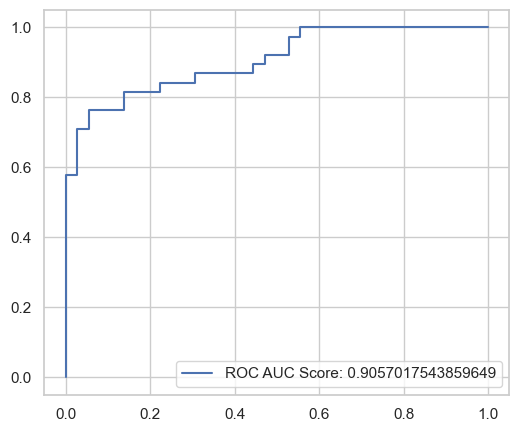

In [116]:
# ROC Curve
mnb_yprob = mnb_model.predict_proba(X_test1)[:, 1]
mnb_fpr, mnb_tpr, mnb_threshold = roc_curve(Y_test, mnb_yprob)
mnb_auc_value = roc_auc_score(Y_test, mnb_yprob)

plt.figure(figsize=(6, 5))
plt.plot(mnb_fpr, mnb_tpr, label=f"ROC AUC Score: {mnb_auc_value}")
plt.legend(loc=4)
plt.show()

In [117]:
# Accuracy Scores for train and test data
mnb_X_train_pred = mnb_model.predict(X_train1)
print("Accuracy Score of trained data : ", accuracy_score(Y_train, mnb_X_train_pred))
mnb_X_test_pred = mnb_model.predict(X_test1)
print("Accuracy Score of test data : ", accuracy_score(Y_test, mnb_X_test_pred))

Accuracy Score of trained data :  0.7636363636363637
Accuracy Score of test data :  0.7162162162162162


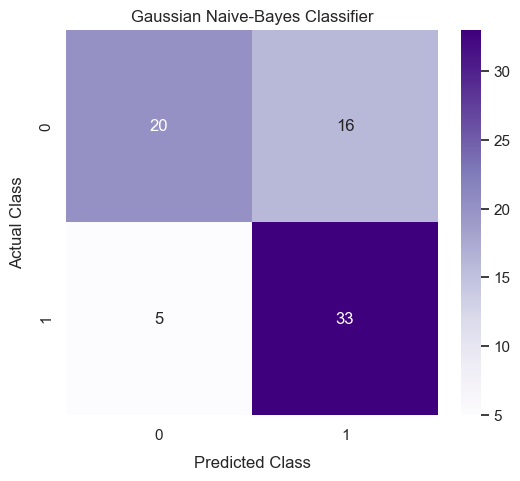

In [118]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
mnb_cm = confusion_matrix(Y_test, mnb_predictions)
sns.heatmap(mnb_cm, annot=True, fmt="d", cmap="Purples", cbar=True)
plt.xlabel("Predicted Class", labelpad=10)
plt.ylabel("Actual Class", labelpad=10)
plt.title("Gaussian Naive-Bayes Classifier")
plt.show()

In [119]:
displayMetrics(evaluateMetrics(mnb_cm), mnb_auc_value)

  Accuracy : 0.7162162162162162
 Precision : 0.673469387755102
    Recall : 0.868421052631579
  F1-Score : 0.7586206896551724
 AUC Score : 0.9057017543859649


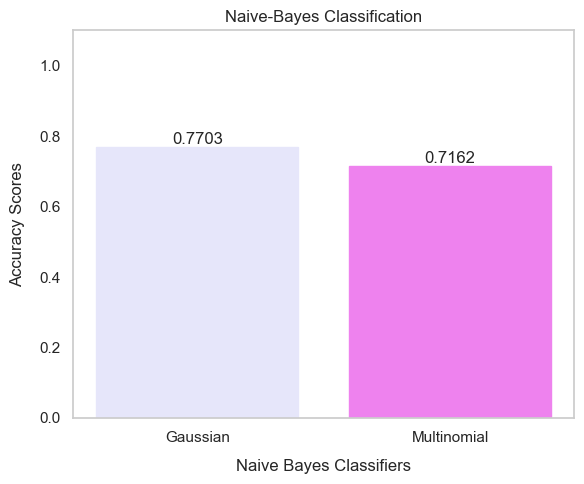

In [120]:
# Comparing both Naive-Bayes Models
# Bar Plot of Accuracies

nb_models = ["Gaussian", "Multinomial"]
gnb_metrics = list(evaluateMetrics(gnb_cm))
gnb_metrics.append(gnb_auc_value)
mnb_metrics = list(evaluateMetrics(mnb_cm))
mnb_metrics.append(mnb_auc_value)
nb_accuracies = [gnb_metrics[0], mnb_metrics[0]]
# print(nb_accuracies)

plt.figure(figsize=(6, 5))
nb_graph = plt.bar(nb_models, nb_accuracies)
plt.xlabel("Naive Bayes Classifiers", labelpad=10)
plt.ylabel("Accuracy Scores", labelpad=10)
plt.title("Naive-Bayes Classification")
plt.ylim(0, 1.10)
plt.xticks()

for i in range(2):
    plt.text(x=i, y=nb_accuracies[i], s=f"{nb_accuracies[i]:.4f}", ha="center", va="bottom")

nb_graph[0].set_color('lavender')
nb_graph[1].set_color('violet')
plt.tight_layout()
plt.grid(False)
plt.show()

In [121]:
# Table between metrics of both models

gnb_metrics_dict = {metrics[i]: gnb_metrics[i] for i in range(len(metrics))}
mnb_metrics_dict = {metrics[i]: mnb_metrics[i] for i in range(len(metrics))}
nb_table = pd.DataFrame({
    'Gaussian' : gnb_metrics_dict,
    'Multinomial' : mnb_metrics_dict
})
print(nb_table)

           Gaussian  Multinomial
Accuracy   0.770270     0.716216
Precision  0.838710     0.673469
Recall     0.684211     0.868421
F1-Score   0.753623     0.758621
AUC Score  0.934211     0.905702


In [122]:
colors = [
    (31/255, 119/255, 180/255),    # Vibrant Blue
    (255/255, 127/255, 14/255),    # Bright Orange
    (44/255, 160/255, 44/255),     # Fresh Green
    (214/255, 39/255, 40/255),     # Purplish Red
    (188/255, 189/255, 34/255)     # Golden Yellow
]

### Barplot of Models with their Accuracies.

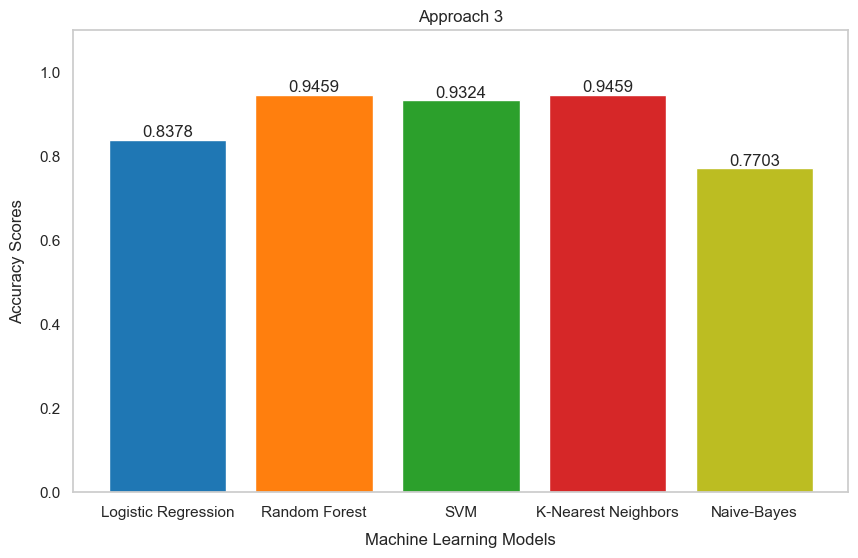

In [124]:
plt.figure(figsize=(10, 6))

models = ['Logistic Regression', 'Random Forest', 'SVM', 'K-Nearest Neighbors', 'Naive-Bayes']
accuracies = [
    l2[0], evaluateMetrics(rfc_cm)[0], 
    svm4[0], evaluateMetrics(knn_cm)[0], 
    gnb_metrics[0]
]

plt.bar(models, accuracies, color=colors)
plt.title("Approach 3")
plt.xlabel("Machine Learning Models", labelpad=10)
plt.ylabel("Accuracy Scores", labelpad=10)
plt.ylim(0, 1.10)
plt.xticks()


for i in range(5):
    plt.text(x=i, y=accuracies[i], s=f"{accuracies[i]:.4f}", ha="center", va="bottom")

plt.grid(False)
plt.show()